In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
from GetData import *

c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_1_source"] = confident["mass1"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confident["mass_2_source"] = confident["mass2"]
c:\Users\lucas\GraveTeamMain\Gravitational-Waves-Research-23-24\Data Analysis\GetData.py:139: SettingWithCopyWarning: 
A value is trying

In [2]:
#O1 = pd.read_csv("../Data/GWTC-1.csv")
#O2 = pd.read_csv("../Data/GWTC-2.csv")
#O3 = pd.read_csv("../Data/GWTC-3.csv")

In [3]:
#O3_indexes_to_remove = [35,36,37,38,39,41]

#O3 = O3.drop(O3_indexes_to_remove)

In [4]:
len(O3)

35

In [5]:
"""
O3_BNS = pd.DataFrame(columns=O3.columns)
O3_BBH = pd.DataFrame(columns=O3.columns)

for index, row in O3.iterrows():
    if row["mass_1_source"] < 2.16 or row["mass_2_source"] < 2.16:
        O3_BNS = pd.concat([O3_BNS, pd.DataFrame([row])], ignore_index=True)
    if row["mass_1_source"] >= 2.16 and row["mass_2_source"] >= 2.16:
        O3_BBH = pd.concat([O3_BBH, pd.DataFrame([row])], ignore_index=True)

print(len(O3_BNS))
print(len(O3_BBH))
"""

'\nO3_BNS = pd.DataFrame(columns=O3.columns)\nO3_BBH = pd.DataFrame(columns=O3.columns)\n\nfor index, row in O3.iterrows():\n    if row["mass_1_source"] < 2.16 or row["mass_2_source"] < 2.16:\n        O3_BNS = pd.concat([O3_BNS, pd.DataFrame([row])], ignore_index=True)\n    if row["mass_1_source"] >= 2.16 and row["mass_2_source"] >= 2.16:\n        O3_BBH = pd.concat([O3_BBH, pd.DataFrame([row])], ignore_index=True)\n\nprint(len(O3_BNS))\nprint(len(O3_BBH))\n'

In [6]:
# Determining the number of mass bins with Sturges rule:
n_O3_BBH = math.ceil(np.log2(len(O3_BBH)) + 1)
print(n_O3_BBH, " bins for mass in O3 BBH")
n_O3_BNS = math.ceil(np.log2(len(O3_BNS)) + 1)
print(n_O3_BNS, " bins for mass in O3 BNS")

7  bins for mass in O3 BBH
2  bins for mass in O3 BNS


In [7]:
O3_min_chirp_mass = min(O3_BBH["chirp_mass_source"])
O3_diff_BBH = max(O3_BBH["chirp_mass_source"]) - O3_min_chirp_mass
print(O3_diff_BBH)

55.44


In [8]:
O3_BBH_mass_bin_range = O3_diff_BBH/7
print(O3_BBH_mass_bin_range)

7.92


In [9]:
# Since red/orange colors haev low wavelengths, they will represent the lower mass ranges 
O3_mass_val = O3_BBH_mass_bin_range
O3_colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink"]

for index, row in O3_BBH.iterrows():
    if row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val:
        O3_BBH.loc[index, "color"] = "red"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 2:
        O3_BBH.loc[index, "color"] = "orange"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 3:
        O3_BBH.loc[index, "color"] = "yellow"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 4:
        O3_BBH.loc[index, "color"] = "green"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 5:
        O3_BBH.loc[index, "color"] = "cyan"
    elif row["chirp_mass_source"] < O3_min_chirp_mass + O3_mass_val * 6:
        O3_BBH.loc[index, "color"] = "indigo"
    else:
        O3_BBH.loc[index, "color"] = "pink"


C:\Users\lucas\AppData\Local\Temp\ipykernel_3460\258097277.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_BBH.loc[index, "color"] = "orange"


In [10]:
# Determining the number of mass bins with Sturges rule:
n_O4_BBH = math.ceil(np.log2(len(O4_BBH)) + 1)
print(n_O4_BBH, " bins for mass in O4 BBH")
n_O4_BNS = math.ceil(np.log2(len(O4_BNS)) + 1)
print(n_O4_BNS, " bins for mass in O4 BNS")

O4_min_chirp_mass = min(O4_BBH["chirp_mass"])
O4_diff_BBH = max(O4_BBH["chirp_mass"]) - O4_min_chirp_mass
print("O4 chirp mass range", O4_diff_BBH)

O4_BBH_mass_bin_range = O4_diff_BBH/n_O4_BBH
print("bin size for O4 BBH", O4_BBH_mass_bin_range)

8  bins for mass in O4 BBH
1  bins for mass in O4 BNS
O4 chirp mass range 162.9204471662701
bin size for O4 BBH 20.36505589578376


In [11]:
# Since red/orange colors haev low wavelengths, they will represent the lower mass ranges 
O4_mass_val = O4_BBH_mass_bin_range
O4_colors = ["red", "orange", "yellow", "green", "cyan", "blue", "indigo", "pink"]

for index, row in O4_BBH.iterrows():
    for i in range(n_O4_BBH):
        if i == n_O4_BBH - 1:
            O4_BBH.loc[index, "color"] = O4_colors[-1]
        if row["chirp_mass"] < O4_min_chirp_mass + O4_mass_val * (i + 1):
            O4_BBH.loc[index, "color"] = O4_colors[i]
            break

C:\Users\lucas\AppData\Local\Temp\ipykernel_3460\4002421841.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH.loc[index, "color"] = O4_colors[i]


In [12]:
"""
plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], color = O3_BBH["color"])

coefficients = np.polyfit(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["luminosity_distance"]), max(O3_BBH["luminosity_distance"]), 100)
plt.plot(x, fit_line_O3(x), color="black")

y_pred = fit_line(O3_BBH["luminosity_distance"])
r2_value = r2_score(O3_BBH["network_matched_filter_snr"], y_pred)
print("R^2 value:", r2_value)

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.ylabel("SNR")
plt.xlabel("$D_L$")
"""

'\nplt.scatter(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], color = O3_BBH["color"])\n\ncoefficients = np.polyfit(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], 2)\nfit_line_O3_BBH = np.poly1d(coefficients)\nx = np.linspace(min(O3_BBH["luminosity_distance"]), max(O3_BBH["luminosity_distance"]), 100)\nplt.plot(x, fit_line_O3(x), color="black")\n\ny_pred = fit_line(O3_BBH["luminosity_distance"])\nr2_value = r2_score(O3_BBH["network_matched_filter_snr"], y_pred)\nprint("R^2 value:", r2_value)\n\nplt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\\odot}$")\nplt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\\odot}$")\nplt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\\odot}$")\nplt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\\odot}$")\nplt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\\odot}$")\nplt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\\odot}$")\nplt.scatter([], [

Text(0, 0.5, '$D_L$')

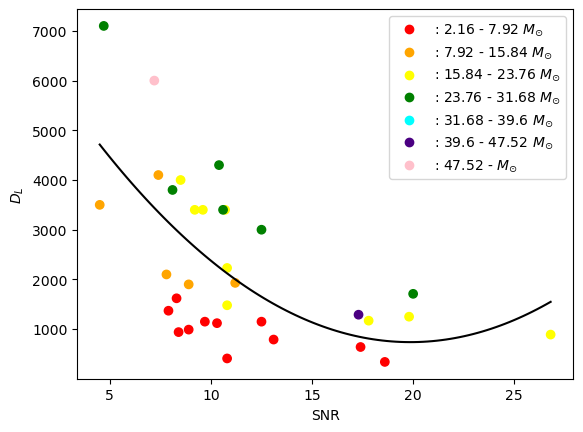

In [13]:
# Inverting so I can get a luminosity distance as a function of SNR (so it can be applied to O4 data):
plt.scatter(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], color = O3_BBH["color"])

coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
plt.plot(x, fit_line_O3_BBH(x), color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.xlabel("SNR")
plt.ylabel("$D_L$")

In [14]:
#O4 = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [15]:
print(len(O4))

82


In [16]:
"""
O4_BNS = pd.DataFrame(columns=O4.columns)
O4_BBH = pd.DataFrame(columns=O4.columns)

for index, row in O4.iterrows():
    if row["mass1"] < 2.16 or row["mass2"] < 2.16:
        O4_BNS = pd.concat([O4_BNS, pd.DataFrame([row])], ignore_index=True)
    if row["mass1"] >= 2.16 and row["mass2"] >= 2.16:
        O4_BBH = pd.concat([O4_BBH, pd.DataFrame([row])], ignore_index=True)

print(len(O4_BNS))
print(len(O4_BBH))
"""

'\nO4_BNS = pd.DataFrame(columns=O4.columns)\nO4_BBH = pd.DataFrame(columns=O4.columns)\n\nfor index, row in O4.iterrows():\n    if row["mass1"] < 2.16 or row["mass2"] < 2.16:\n        O4_BNS = pd.concat([O4_BNS, pd.DataFrame([row])], ignore_index=True)\n    if row["mass1"] >= 2.16 and row["mass2"] >= 2.16:\n        O4_BBH = pd.concat([O4_BBH, pd.DataFrame([row])], ignore_index=True)\n\nprint(len(O4_BNS))\nprint(len(O4_BBH))\n'

In [17]:
#O4_BBH_reduced = O4_BBH["snr"]/1.6 

In [18]:
#O4_BBH["predicted_luminosity_distance"] = fit_line_O3_BBH(O4_BBH["snr"])

In [19]:
"""
plt.scatter(np.log(O3_BBH["luminosity_distance"]), np.log(O3_BBH["network_matched_filter_snr"]), color = O3_BBH["color"])
#plt.scatter(O4_BBH["snr"], O4_BBH["predicted_luminosity_distance"], color = "black")

coefficients = np.polyfit(np.log(O3_BBH["network_matched_filter_snr"]),np.log(O3_BBH["luminosity_distance"]), 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(np.log(O3_BBH["network_matched_filter_snr"])), max(np.log(O3_BBH["network_matched_filter_snr"])), 100)
plt.plot(x, fit_line_O3_BBH(x), color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.ylabel("$log(SNR)$")
plt.xlabel("$log(D_L)$")
"""

'\nplt.scatter(np.log(O3_BBH["luminosity_distance"]), np.log(O3_BBH["network_matched_filter_snr"]), color = O3_BBH["color"])\n#plt.scatter(O4_BBH["snr"], O4_BBH["predicted_luminosity_distance"], color = "black")\n\ncoefficients = np.polyfit(np.log(O3_BBH["network_matched_filter_snr"]),np.log(O3_BBH["luminosity_distance"]), 2)\nfit_line_O3_BBH = np.poly1d(coefficients)\nx = np.linspace(min(np.log(O3_BBH["network_matched_filter_snr"])), max(np.log(O3_BBH["network_matched_filter_snr"])), 100)\nplt.plot(x, fit_line_O3_BBH(x), color="black")\n\nplt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\\odot}$")\nplt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\\odot}$")\nplt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\\odot}$")\nplt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\\odot}$")\nplt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\\odot}$")\nplt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\\odot}$")\nplt.scatter([],

In [20]:
"""
plt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"]/np.sqrt(O3_BBH["mass_1_source"]+O3_BBH["mass_2_source"]), color = O3_BBH["color"])
plt.scatter(O4_BBH["predicted_luminosity_distance"],O4_BBH["snr"]/np.sqrt(O4_BBH["mass1"]+O4_BBH["mass2"]), color = "black", label="predicted")

#coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
#fit_line_O3_BBH = np.poly1d(coefficients)
#x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
#plt.plot(fit_line_O3_BBH(x), x, color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.xlabel("$D_L$")
plt.ylabel("SNR")
"""

'\nplt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"]/np.sqrt(O3_BBH["mass_1_source"]+O3_BBH["mass_2_source"]), color = O3_BBH["color"])\nplt.scatter(O4_BBH["predicted_luminosity_distance"],O4_BBH["snr"]/np.sqrt(O4_BBH["mass1"]+O4_BBH["mass2"]), color = "black", label="predicted")\n\n#coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)\n#fit_line_O3_BBH = np.poly1d(coefficients)\n#x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)\n#plt.plot(fit_line_O3_BBH(x), x, color="black")\n\nplt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\\odot}$")\nplt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\\odot}$")\nplt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\\odot}$")\nplt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\\odot}$")\nplt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\\odot}$")\nplt.scatter([], [],

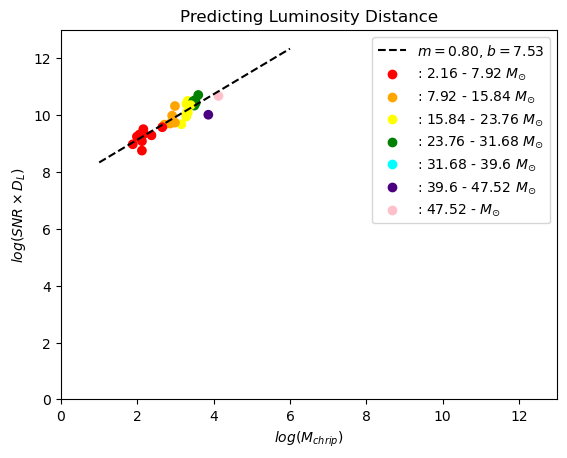

slope: 0.8003270810708449
intercept: 7.5344486827032515


In [21]:
sub_O3_BBH = O3_BBH[(O3_BBH["chirp_mass_source"] != 7.49)] #& (O3_BBH["chirp_mass_source"] != 47.5)]

plt.scatter(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["luminosity_distance"] * sub_O3_BBH["network_matched_filter_snr"]), color = sub_O3_BBH["color"])

coefficients = np.polyfit(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["luminosity_distance"] * sub_O3_BBH["network_matched_filter_snr"]), 1)
m, b = coefficients
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(1, 6, 100)
plt.plot(x, fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$m={m:.2f}$, $b={b:.2f}$")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.title("Predicting Luminosity Distance")
plt.ylim((0,13))
plt.xlim((0,13))
plt.ylabel("$log(SNR\\times D_L)$")
plt.xlabel("$log(M_{chrip})$")
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

$SNR=k(M_{chrip})\times D^{-1}_L$

$ln(SNR\times D_L)\approx m\times ln(M_{chrip}) + b$

$D_L\approx \frac{M^{m}_{chrip}}{SNR}e^b$ (Probably didn't need this step)

$c$ : noise reduction factor (converts SNR between observation groups)

$ln(D_L)\approx m\times ln(M_{chrip}) - ln(SNR) - ln(c) + b$

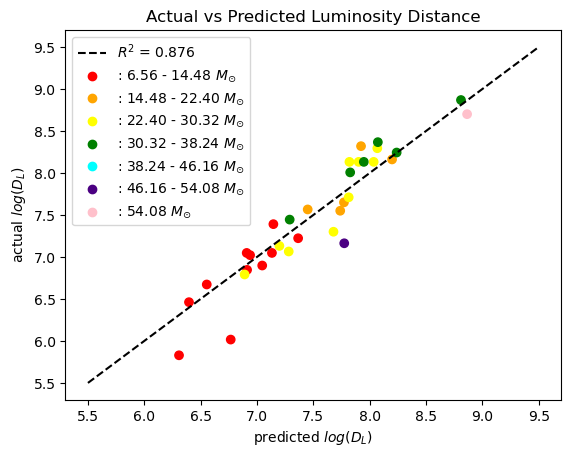

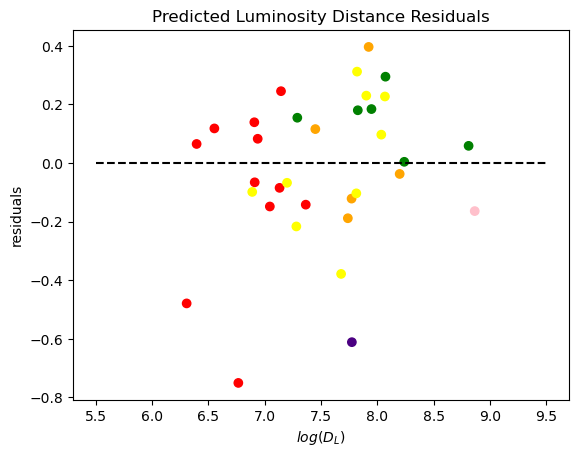

c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


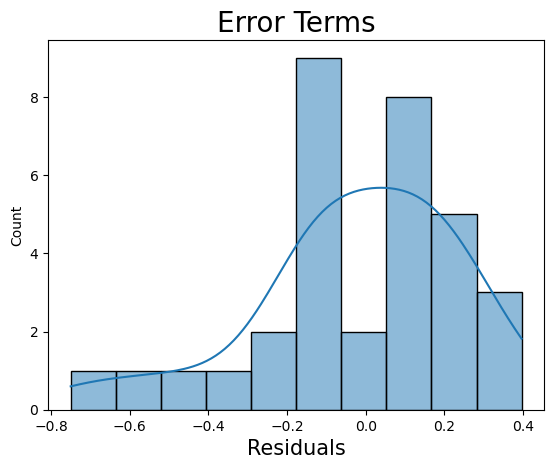

slope: 0.8003270810708449
intercept: 7.5344486827032515


In [22]:
O3_BBH_df = O3_BBH

predicted_luminosity_distances = m * np.log(O3_BBH_df["chirp_mass_source"]) - np.log(O3_BBH_df["network_matched_filter_snr"]) + b

plt.scatter(predicted_luminosity_distances,np.log(O3_BBH_df["luminosity_distance"]), color = O3_BBH_df["color"])

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))

for i in range(n_O3_BBH):
    if i == n_O3_BBH - 1:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} " + "$M_{\odot}$")
    else:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} - {O3_min_chirp_mass + O3_mass_val * (i + 1):.2f} " + "$M_{\odot}$")
"""
plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
"""

plt.legend()
plt.title("Actual vs Predicted Luminosity Distance")
plt.ylabel("actual $log(D_L)$")
plt.xlabel("predicted $log(D_L)$")
plt.show()

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(predicted_luminosity_distances,np.log(O3_BBH_df["luminosity_distance"]) - predicted_luminosity_distances, color = O3_BBH_df["color"])
plt.title("Predicted Luminosity Distance Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(D_L)$")
plt.show()

residuals = np.log(O3_BBH_df["luminosity_distance"]) - predicted_luminosity_distances

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

Predicting luminosity distance in O4 data

$ln(D_L)\approx m\times ln(M_{chrip}) - ln(SNR) - ln(c) + b$

$D_L\approx \frac{1}{c}\frac{M^{m}_{chrip}}{SNR}e^b$

In [23]:
SNR_scale_factor = 1.6

def predict_luminosity_distance(df, m, b, c):
    return (np.e ** b) * (df['chirp_mass'] ** m) / (c * df['snr'])

O4_BBH['luminosity_distance'] = predict_luminosity_distance(O4_BBH, m, b, SNR_scale_factor)

C:\Users\lucas\AppData\Local\Temp\ipykernel_3460\1386165765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH['luminosity_distance'] = predict_luminosity_distance(O4_BBH, m, b, SNR_scale_factor)


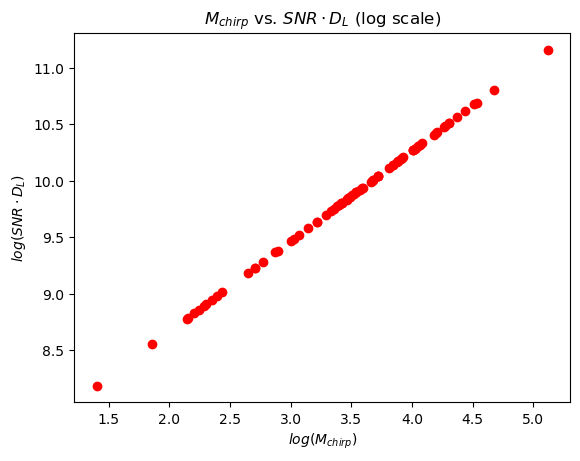

In [24]:
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["snr"] * O4_BBH["luminosity_distance"]), color = "red", label="O4")
plt.title("$M_{chirp}$ vs. $SNR\cdot D_L$ (log scale)")
plt.xlabel("$log(M_{chirp})$")
plt.ylabel("$log(SNR\cdot D_L)$")
plt.show()

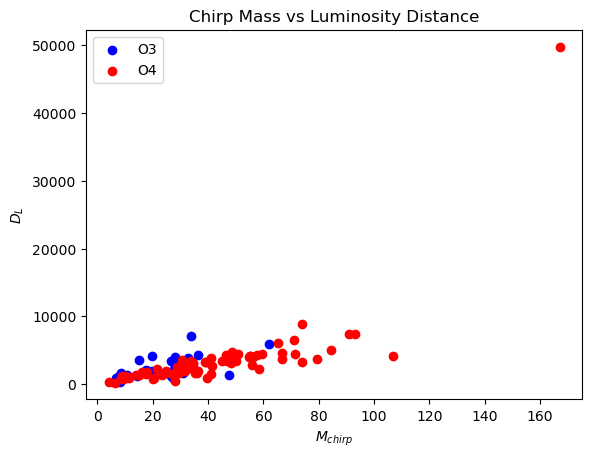

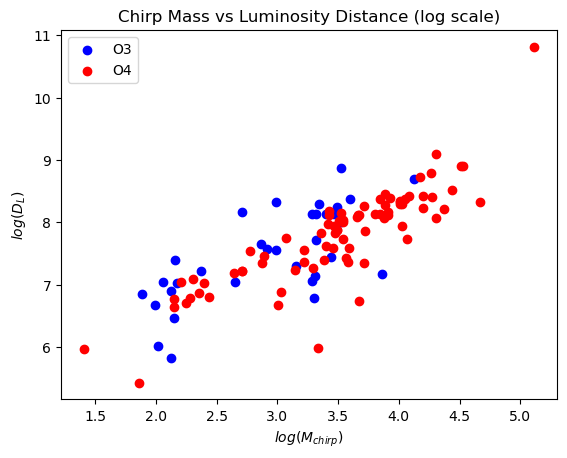

In [25]:
plt.scatter(O3_BBH["chirp_mass"], O3_BBH["luminosity_distance"], color = "blue", label="O3")
plt.scatter(O4_BBH["chirp_mass"], O4_BBH["luminosity_distance"], color = "red", label="O4")

plt.legend()
plt.title("Chirp Mass vs Luminosity Distance")
plt.xlabel("$M_{chirp}$")
plt.ylabel("$D_L$")
plt.show()

# log scale

plt.scatter(np.log(O3_BBH["chirp_mass"]), np.log(O3_BBH["luminosity_distance"]), color = "blue", label="O3")
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["luminosity_distance"]), color = "red", label="O4")

plt.legend()
plt.title("Chirp Mass vs Luminosity Distance (log scale)")
plt.ylabel("$log(D_L)$")
plt.xlabel("$log(M_{chirp})$")
plt.show()

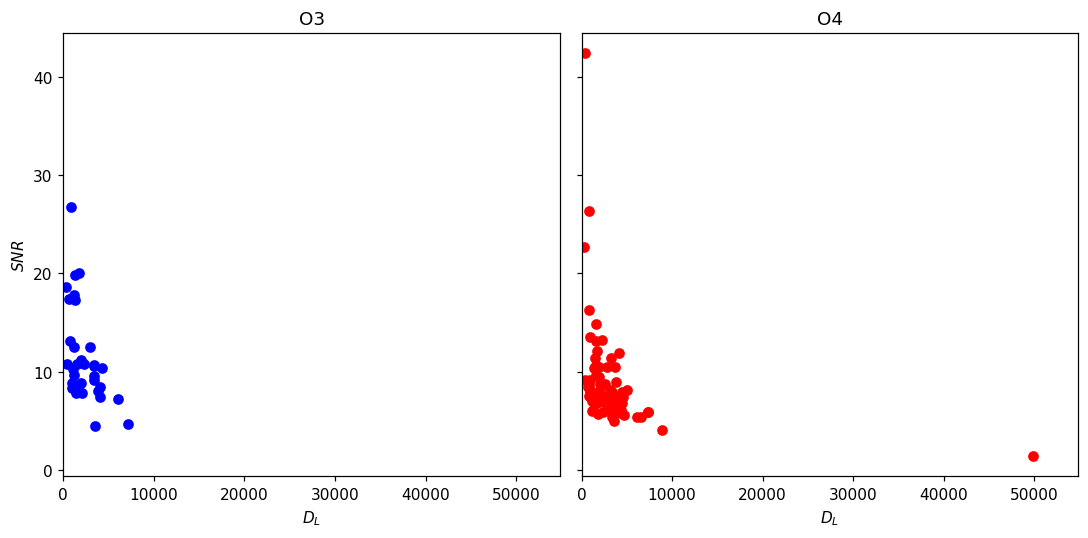

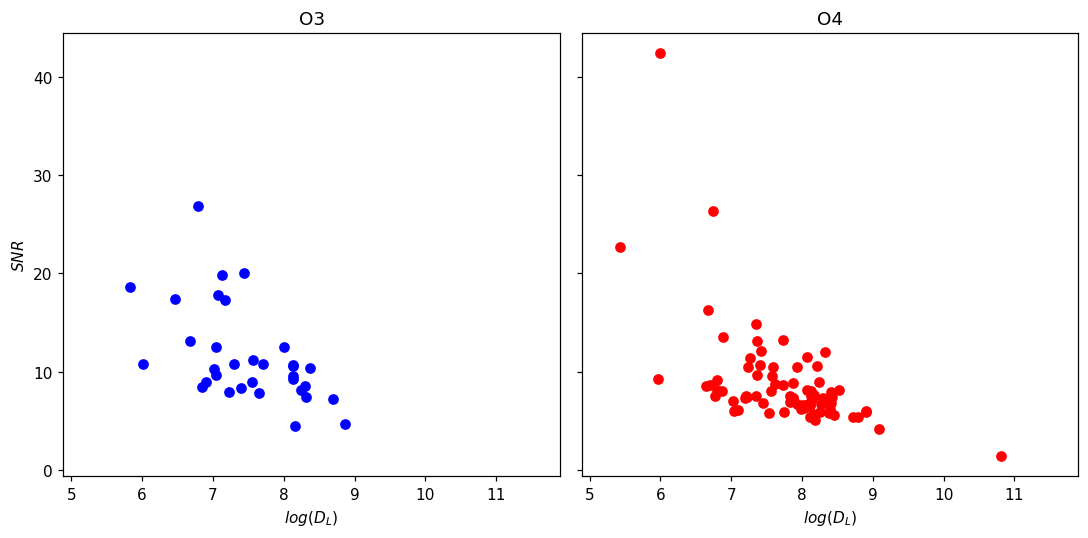

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], color = "blue")
ax1.set_title("O3")
ax1.set_xlabel("$D_L$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(0, max(O4_BBH["luminosity_distance"]) * 1.1)

sc = ax2.scatter(O4_BBH["luminosity_distance"], O4_BBH["snr"], color = "red")
ax2.set_title("O4")
ax2.set_xlabel("$D_L$")
ax2.set_xlim(0, max(O4_BBH["luminosity_distance"]) * 1.1)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(np.log(O3_BBH["luminosity_distance"]), O3_BBH["snr"], color = "blue")
ax1.set_title("O3")
ax1.set_xlabel("$log(D_L)$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(min(np.log(O4_BBH["luminosity_distance"])) * 0.9, max(np.log(O4_BBH["luminosity_distance"])) * 1.1)

sc = ax2.scatter(np.log(O4_BBH["luminosity_distance"]), O4_BBH["snr"], color = "red")
ax2.set_title("O4")
ax2.set_xlabel("$log(D_L)$")
ax2.set_xlim(min(np.log(O4_BBH["luminosity_distance"])) * 0.9, max(np.log(O4_BBH["luminosity_distance"])) * 1.1)

plt.tight_layout()
plt.show()

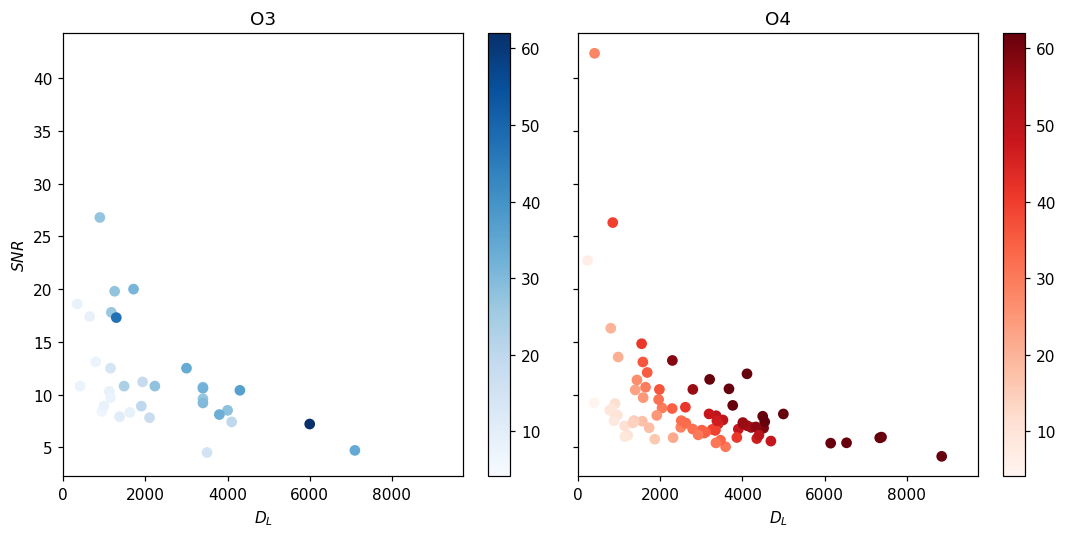

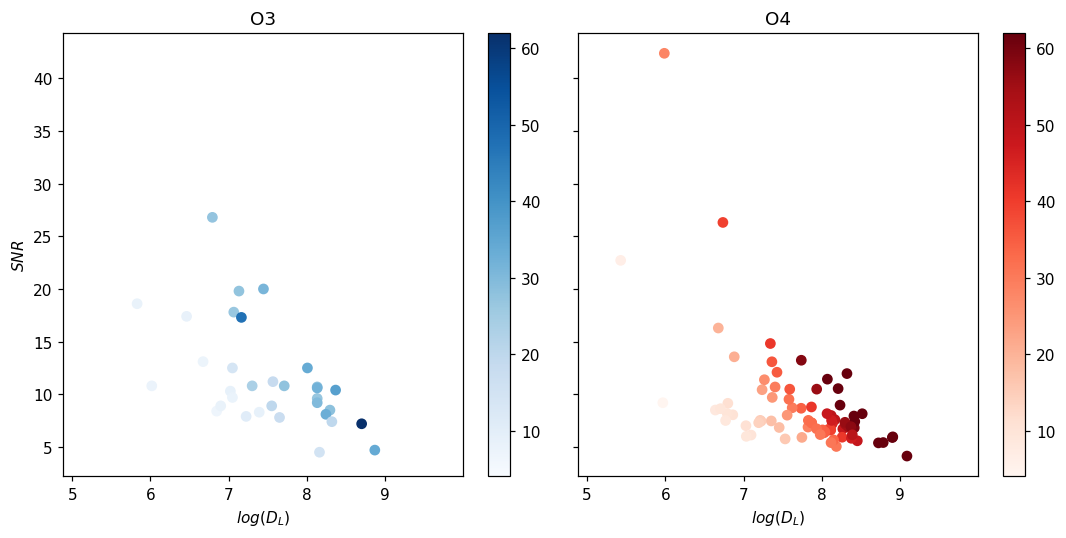

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)
cm1 = plt.colormaps['Blues']
cm2 = plt.colormaps['Reds']

sub_O4_BBH = O4_BBH[O4_BBH['chirp_mass'] < 140]

max_O3_mass = max(O3_BBH["chirp_mass"])
min_O4_mass = min(sub_O4_BBH["chirp_mass"])
sc = ax1.scatter(O3_BBH["luminosity_distance"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_O4_mass, vmax=max_O3_mass)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("$D_L$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(0, max(sub_O4_BBH["luminosity_distance"]) * 1.1)

sc = ax2.scatter(sub_O4_BBH["luminosity_distance"], sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_O4_mass, vmax=max_O3_mass)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("$D_L$")
ax2.set_xlim(0, max(sub_O4_BBH["luminosity_distance"]) * 1.1)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(np.log(O3_BBH["luminosity_distance"]), O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1, vmin=min_O4_mass, vmax=max_O3_mass)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("$log(D_L)$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(min(np.log(sub_O4_BBH["luminosity_distance"])) * 0.9, max(np.log(sub_O4_BBH["luminosity_distance"])) * 1.1)
sc = ax2.scatter(np.log(sub_O4_BBH["luminosity_distance"]), sub_O4_BBH["snr"], c = sub_O4_BBH["chirp_mass"], cmap=cm2, vmin=min_O4_mass, vmax=max_O3_mass)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("$log(D_L)$")
ax2.set_xlim(min(np.log(sub_O4_BBH["luminosity_distance"])) * 0.9, max(np.log(sub_O4_BBH["luminosity_distance"])) * 1.1)

plt.tight_layout()
plt.show()

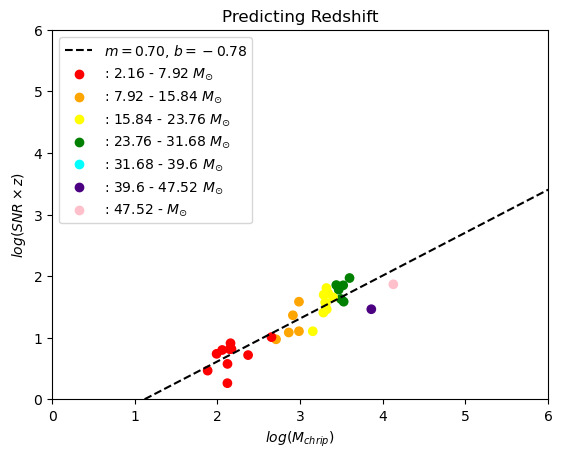

slope: 0.696945202846226
intercept: -0.776485255604959


In [28]:
plt.scatter(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["redshift"] * sub_O3_BBH["network_matched_filter_snr"]), color = sub_O3_BBH["color"])

coefficients = np.polyfit(np.log(sub_O3_BBH["chirp_mass_source"]), np.log(sub_O3_BBH["redshift"] * sub_O3_BBH["network_matched_filter_snr"]), 1)
m, b = coefficients
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(1, 6, 100)
plt.plot(x, fit_line_O3_BBH(x), color="black", linestyle="--", label=f"$m={m:.2f}$, $b={b:.2f}$")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.title("Predicting Redshift")
plt.ylim((0,6))
plt.xlim((0,6))
plt.ylabel("$log(SNR\\times z)$")
plt.xlabel("$log(M_{chrip})$")
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

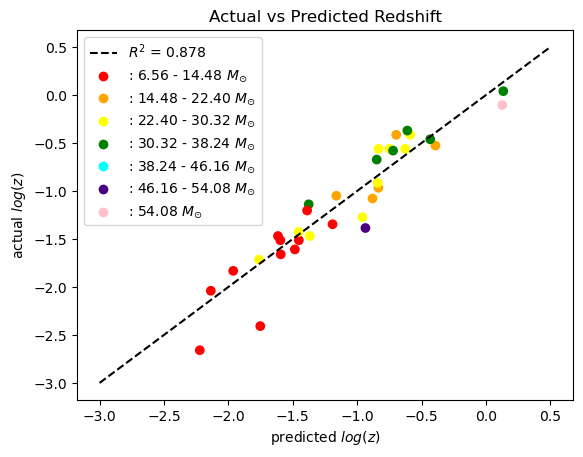

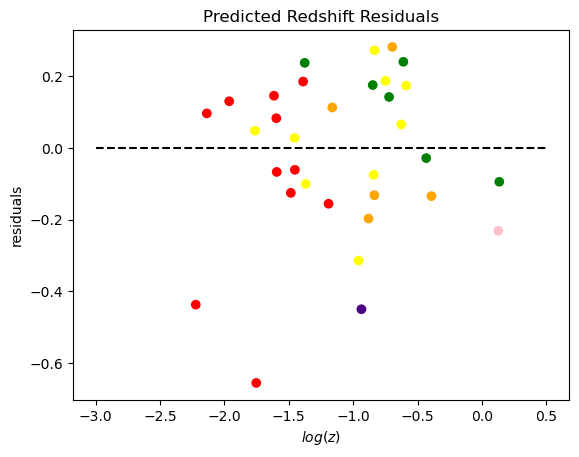

c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


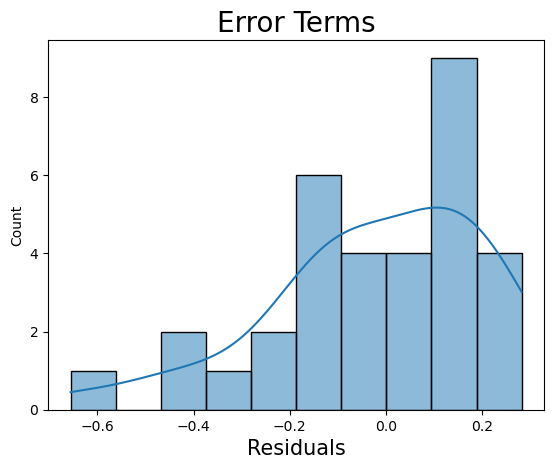

slope: 0.696945202846226
intercept: -0.776485255604959


In [29]:
O3_BBH_df = O3_BBH

predicted_redshift = m * np.log(O3_BBH_df["chirp_mass_source"]) - np.log(O3_BBH_df["network_matched_filter_snr"]) + b

plt.scatter(predicted_redshift,np.log(O3_BBH_df["redshift"]), color = O3_BBH_df["color"])

x = np.linspace(-3, 0.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["redshift"]), predicted_redshift)))

for i in range(n_O3_BBH):
    if i == n_O3_BBH - 1:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} " + "$M_{\odot}$")
    else:
        plt.scatter([], [], color=O3_colors[i], label=f": {O3_min_chirp_mass + O3_mass_val * i:.2f} - {O3_min_chirp_mass + O3_mass_val * (i + 1):.2f} " + "$M_{\odot}$")

plt.legend()
plt.title("Actual vs Predicted Redshift")
plt.ylabel("actual $log(z)$")
plt.xlabel("predicted $log(z)$")
plt.show()

x = np.linspace(-3, 0.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O3_BBH_df["redshift"]), predicted_redshift)))
plt.scatter(predicted_redshift,np.log(O3_BBH_df["redshift"]) - predicted_redshift, color = O3_BBH_df["color"])
plt.title("Predicted Redshift Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(z)$")
plt.show()

residuals = np.log(O3_BBH_df["redshift"]) - predicted_redshift

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")

In [30]:
SNR_scale_factor = 1.6

def predict_redshift(df, m, b, c):
    return (np.e ** b) * (df['chirp_mass'] ** m) / (c * df['snr'])

O4_BBH['redshift'] = predict_redshift(O4_BBH, m, b, SNR_scale_factor)

C:\Users\lucas\AppData\Local\Temp\ipykernel_3460\3714966764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O4_BBH['redshift'] = predict_redshift(O4_BBH, m, b, SNR_scale_factor)


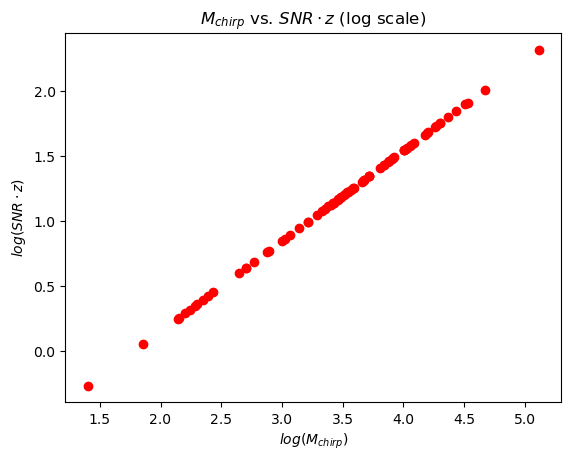

In [31]:
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["snr"] * O4_BBH["redshift"]), color = "red", label="O4")
plt.title("$M_{chirp}$ vs. $SNR\cdot z$ (log scale)")
plt.xlabel("$log(M_{chirp})$")
plt.ylabel("$log(SNR\cdot z)$")
plt.show()

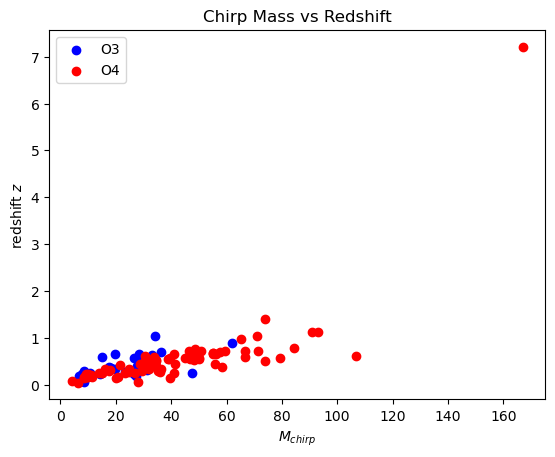

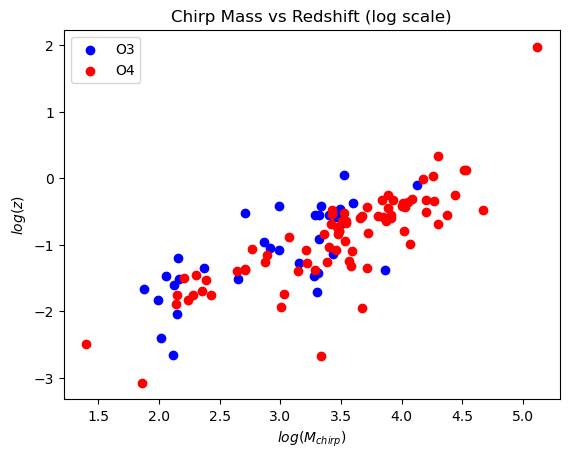

In [32]:
plt.scatter(O3_BBH["chirp_mass"], O3_BBH["redshift"], color = "blue", label="O3")
plt.scatter(O4_BBH["chirp_mass"], O4_BBH["redshift"], color = "red", label="O4")

plt.legend()
plt.title("Chirp Mass vs Redshift")
plt.xlabel("$M_{chirp}$")
plt.ylabel("redshift $z$")
plt.show()

# log scale

plt.scatter(np.log(O3_BBH["chirp_mass"]), np.log(O3_BBH["redshift"]), color = "blue", label="O3")
plt.scatter(np.log(O4_BBH["chirp_mass"]), np.log(O4_BBH["redshift"]), color = "red", label="O4")

plt.legend()
plt.title("Chirp Mass vs Redshift (log scale)")
plt.ylabel("$log(z)$")
plt.xlabel("$log(M_{chirp})$")
plt.show()

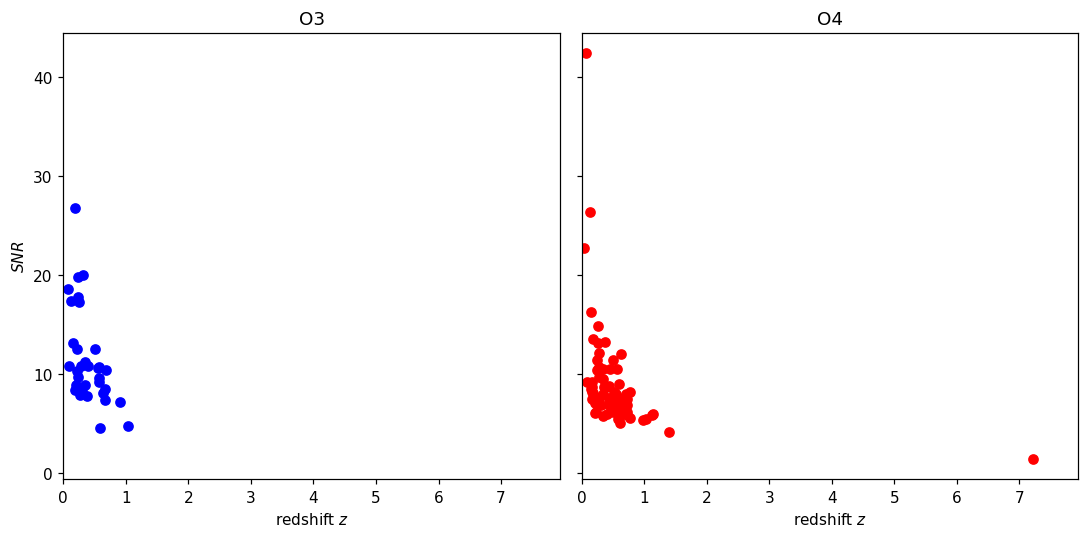

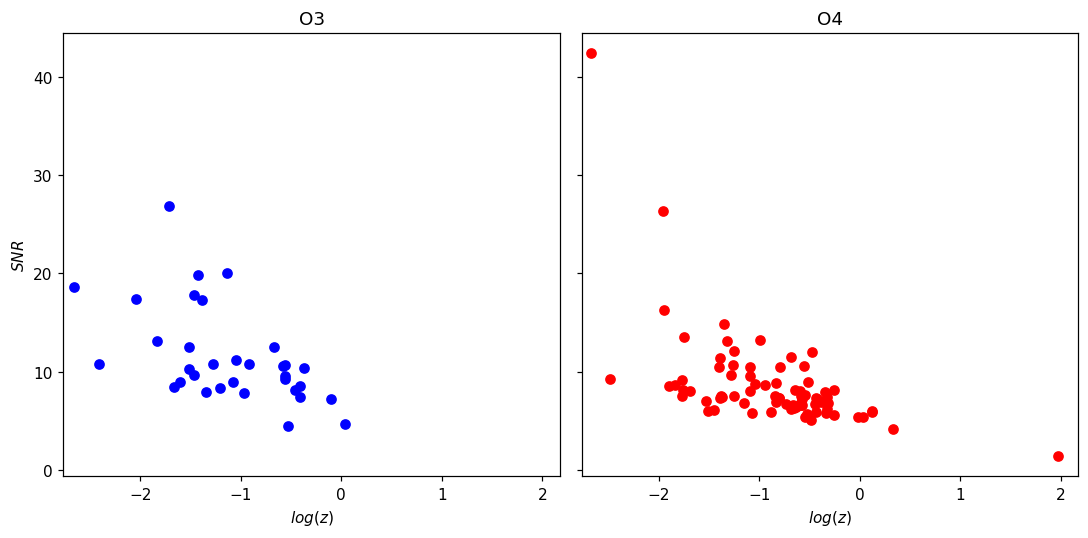

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(O3_BBH["redshift"], O3_BBH["snr"], color = "blue")
ax1.set_title("O3")
ax1.set_xlabel("redshift $z$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

sc = ax2.scatter(O4_BBH["redshift"], O4_BBH["snr"], color = "red")
ax2.set_title("O4")
ax2.set_xlabel("redshift $z$")
ax2.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(np.log(O3_BBH["redshift"]), O3_BBH["snr"], color = "blue")
ax1.set_title("O3")
ax1.set_xlabel("$log(z)$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

sc = ax2.scatter(np.log(O4_BBH["redshift"]), O4_BBH["snr"], color = "red")
ax2.set_title("O4")
ax2.set_xlabel("$log(z)$")
ax2.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

plt.tight_layout()
plt.show()

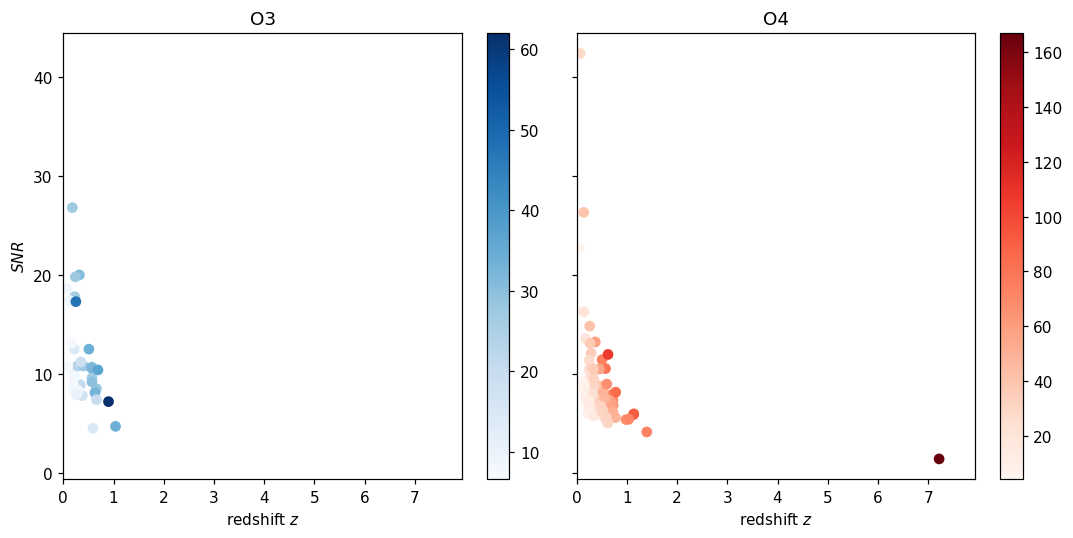

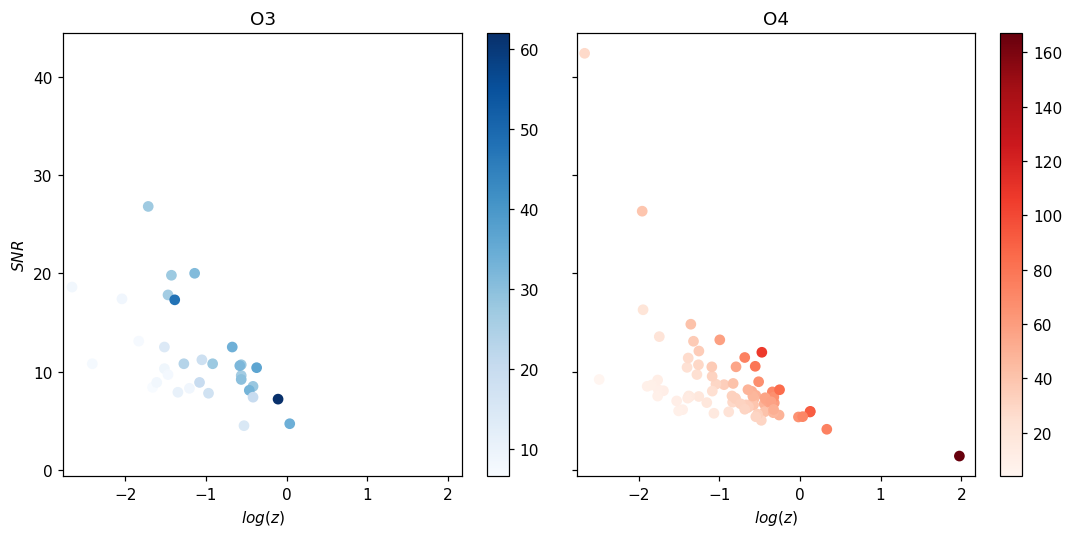

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)
cm1 = plt.colormaps['Blues']
cm2 = plt.colormaps['Reds']

sc = ax1.scatter(O3_BBH["redshift"], O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("redshift $z$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

sc = ax2.scatter(O4_BBH["redshift"], O4_BBH["snr"], c = O4_BBH["chirp_mass"], cmap=cm2)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("redshift $z$")
ax2.set_xlim(0, max(O4_BBH["redshift"]) * 1.1)

plt.tight_layout()
plt.show()

# log scale

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=110, sharey=True)

sc = ax1.scatter(np.log(O3_BBH["redshift"]), O3_BBH["snr"], c = O3_BBH["chirp_mass"], cmap=cm1)
plt.colorbar(sc, ax=ax1)
ax1.set_title("O3")
ax1.set_xlabel("$log(z)$")
ax1.set_ylabel("$SNR$")
ax1.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

sc = ax2.scatter(np.log(O4_BBH["redshift"]), O4_BBH["snr"], c = O4_BBH["chirp_mass"], cmap=cm2)
plt.colorbar(sc, ax=ax2)
ax2.set_title("O4")
ax2.set_xlabel("$log(z)$")
ax2.set_xlim(min(np.log(O4_BBH["redshift"])) * 0.9, max(np.log(O4_BBH["redshift"])) * 1.1)

plt.tight_layout()
plt.show()

In [35]:
O4_BBH.to_csv("PredictedData/O4_BBH_predicted_distance.csv")

$ln(D_L)\approx m\times ln(M_{chrip}) - ln(SNR) - ln(c) + b$

$D_L=\frac{1}{c}\frac{M_{chrip}^m}{SNR}e^b$

In [36]:
def fit_slope(x_feature, y_feature : str, y_intercept : int = 0) -> float:
    y_reduced = y_feature - y_intercept
    
    x = np.array(x_feature)[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y_reduced, rcond=None)
    
    return a[0]

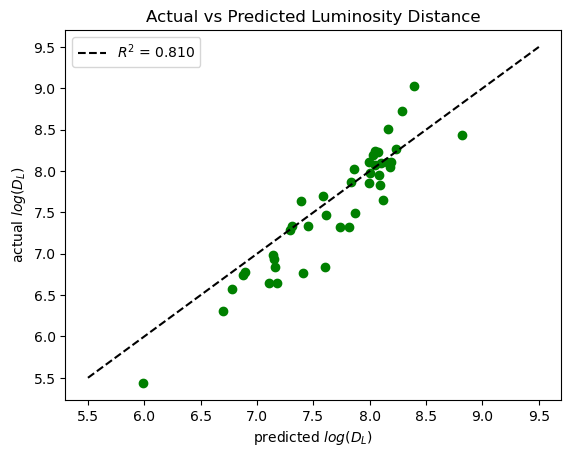

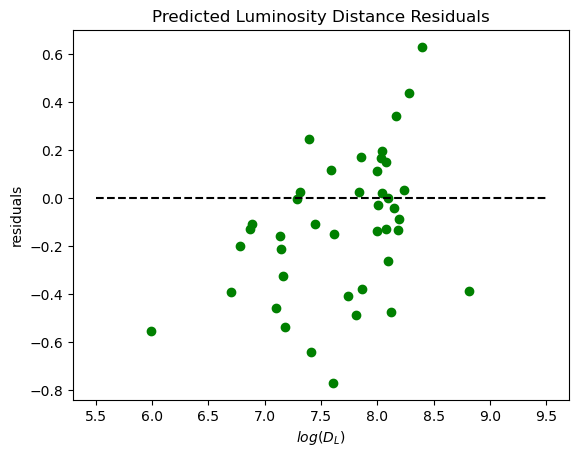

c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


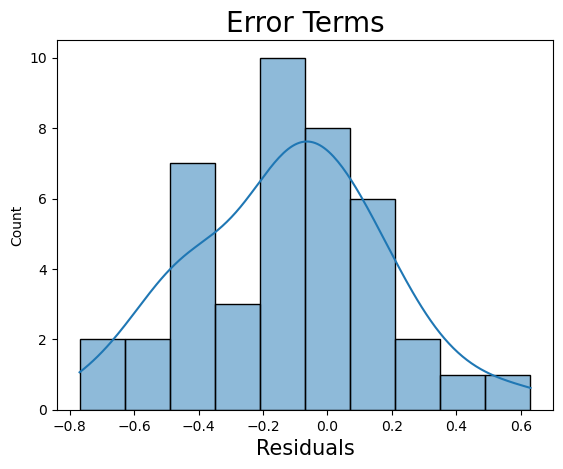

slope: 0.696945202846226
intercept: -0.776485255604959
SNR scaler: 0.00016029069347459426


In [37]:
c = 1 / fit_slope((O2_BBH["chirp_mass"] ** m) * (np.e ** b) / O2_BBH["snr"], O2_BBH["luminosity_distance"])

predicted_luminosity_distances = m * np.log(O2_BBH["chirp_mass"]) - np.log(O2_BBH["snr"]) - np.log(c) + b

plt.scatter(predicted_luminosity_distances,np.log(O2_BBH["luminosity_distance"]), color = 'g')

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O2_BBH["luminosity_distance"]), predicted_luminosity_distances)))

"""
plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
"""

plt.legend()
plt.title("Actual vs Predicted Luminosity Distance")
plt.ylabel("actual $log(D_L)$")
plt.xlabel("predicted $log(D_L)$")
plt.show()

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O2_BBH["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(predicted_luminosity_distances,np.log(O2_BBH["luminosity_distance"]) - predicted_luminosity_distances, color = 'g')
plt.title("Predicted Luminosity Distance Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(D_L)$")
plt.show()

residuals = np.log(O2_BBH["luminosity_distance"]) - predicted_luminosity_distances

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")
print(f"SNR scaler: {c}")

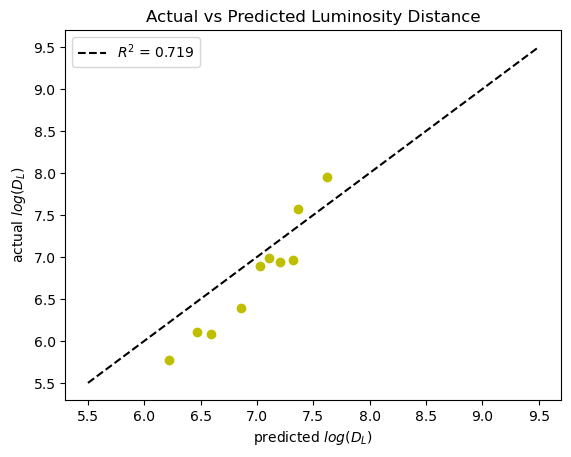

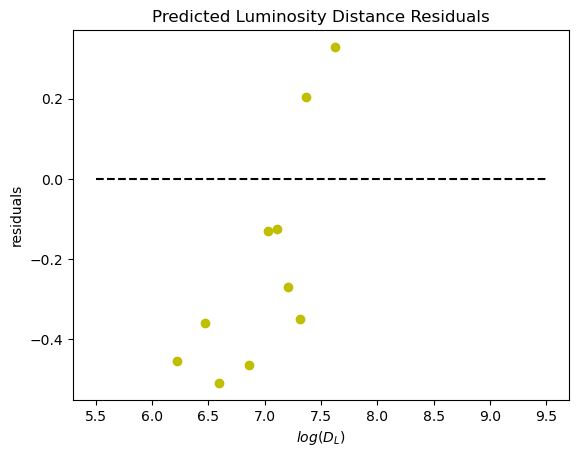

c:\Users\lucas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


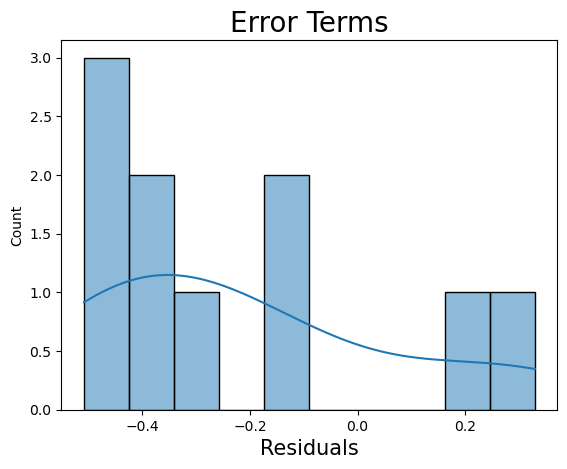

slope: 0.696945202846226
intercept: -0.776485255604959
SNR scaler: 0.00025035757142725793


In [38]:
O1_BBH_reduced = O1_BBH#[(O1_BBH["luminosity_distance"] != 600.0) & (O1_BBH["luminosity_distance"] != 440.0) & (O1_BBH["luminosity_distance"] != 1060.0)]

c = 1 / fit_slope((O1_BBH_reduced["chirp_mass"] ** m) * (np.e ** b) / O1_BBH_reduced["snr"], O1_BBH_reduced["luminosity_distance"])

predicted_luminosity_distances = m * np.log(O1_BBH_reduced["chirp_mass"]) - np.log(O1_BBH_reduced["snr"]) - np.log(c) + b

plt.scatter(predicted_luminosity_distances,np.log(O1_BBH_reduced["luminosity_distance"]), color = 'y')

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,x, color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O1_BBH_reduced["luminosity_distance"]), predicted_luminosity_distances)))

"""
plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")
"""

plt.legend()
plt.title("Actual vs Predicted Luminosity Distance")
plt.ylabel("actual $log(D_L)$")
plt.xlabel("predicted $log(D_L)$")
plt.show()

x = np.linspace(5.5, 9.5, 10)
plt.plot(x,np.zeros(10), color = "black", linestyle="--", label="$R^2$ = {:.3f}".format(r2_score(np.log(O1_BBH_reduced["luminosity_distance"]), predicted_luminosity_distances)))
plt.scatter(predicted_luminosity_distances,np.log(O1_BBH_reduced["luminosity_distance"]) - predicted_luminosity_distances, color = 'y')
plt.title("Predicted Luminosity Distance Residuals")
plt.ylabel("residuals")
plt.xlabel("$log(D_L)$")
plt.show()

residuals = np.log(O1_BBH_reduced["luminosity_distance"]) - predicted_luminosity_distances

sns.histplot(residuals, bins = 10, kde=True) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)     
plt.show()

m, b = coefficients
print(f"slope: {m}")
print(f"intercept: {b}")
print(f"SNR scaler: {c}")